In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set()
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [26]:

df = pd.read_csv(r'/Users/sot/Downloads/data_rt.csv')

In [27]:
df

,reviews,labels
0,"simplistic , silly and tedious .",0
1,"it's so laddish and juvenile , only teenage bo...",0
2,exploitative and largely devoid of the depth o...,0
3,[garbus] discards the potential for pathologic...,0
4,a visually flashy but narratively opaque and e...,0
...,...,...
10657,both exuberantly romantic and serenely melanch...,1
10658,mazel tov to a film about a family's joyous li...,1
10659,standing in the shadows of motown is the best ...,1
10660,it's nice to see piscopo again after all these...,1


<Axes: xlabel='labels', ylabel='count'>

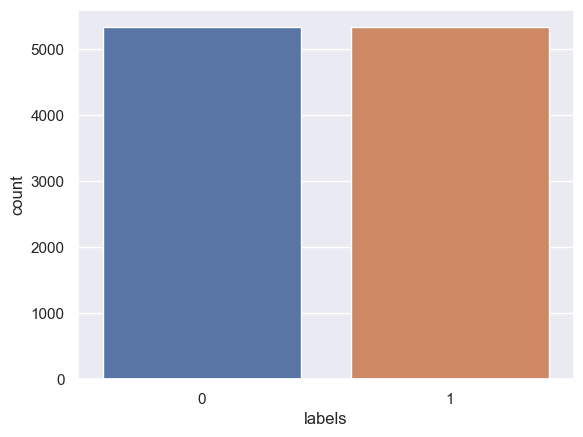

In [28]:
sns.countplot(data = df, x='labels') 

In [29]:
df['labels'].value_counts()

labels
0    5331
1    5331
Name: count, dtype: int64

In [30]:
df['reviews'].str.isspace().sum()

0

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10662 entries, 0 to 10661
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   reviews  10662 non-null  object
 1   labels   10662 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 166.7+ KB


In [32]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

In [33]:
nltk.download('stopwords')
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to /Users/sot/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [34]:
corpus = []
stemmer = PorterStemmer()
all_stopwords = stopwords.words('english')

for i in range(0, 10662):
    review = re.sub('[^a-zA-Z]', ' ', df['reviews'][i])
    review = review.lower()
    review = review.split()
    review = [stemmer.stem(word) for word in review if not word in set(all_stopwords)]
    review = ' '.join(review)
    corpus.append(review)


In [35]:
cv = CountVectorizer(max_features =9500)
X = cv.fit_transform(corpus).toarray()
y = df['labels'].values

In [36]:
len(X[0])

9500

In [37]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [38]:
X_train.shape

(8529, 9500)

In [39]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)

MinMaxScaler()

In [40]:
X_train= scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [46]:
from tensorflow.keras.callbacks import EarlyStopping,TensorBoard
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.models import Sequential

In [47]:
## setting my time so i can  have a unique log to run different parameters
from datetime import datetime

In [48]:
datetime.now().strftime("%Y-%m-%d--%H%M")

'2024-10-24--1718'

In [52]:
log_directory = 'logs/fit'

board = TensorBoard(log_dir = log_directory,histogram_freq = 1,
                    write_graph = True,
                    write_images = True,
                    update_freq = 'epoch',
                    profile_batch = 2,
                    embeddings_freq = 1 )

2024-10-24 17:19:43.189843: I external/local_tsl/tsl/profiler/lib/profiler_session.cc:103] Profiler session initializing.
2024-10-24 17:19:43.190323: I external/local_tsl/tsl/profiler/lib/profiler_session.cc:118] Profiler session started.
2024-10-24 17:19:43.196620: I external/local_tsl/tsl/profiler/lib/profiler_session.cc:130] Profiler session tear down.


In [53]:
model = Sequential()

model.add(Dense(1000,activation='relu'))
model.add(Dropout(0.3)),
              
model.add(Dense(500,activation='relu'))
model.add(Dropout(0.3)),
              
model.add(Dense(250,activation='relu')),
model.add(Dropout(0.3)),

model.add(Dense(125,activation='relu')),
model.add(Dropout(0.3)),

model.add(Dense(65,activation='relu')),
model.add(Dropout(0.3)),


model.add(Dense(20,activation='relu')),
model.add(Dropout(0.3)),

    
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy',metrics = ['accuracy'])

2024-10-24 17:19:48.362394: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1
2024-10-24 17:19:48.362906: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2024-10-24 17:19:48.362915: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
2024-10-24 17:19:48.362960: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-10-24 17:19:48.363320: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [56]:
early_stop = EarlyStopping(monitor = 'val_loss',mode= 'min',verbose = 1,patience = 2)

In [57]:

model.fit(X_train, y_train, epochs=10, batch_size=256,validation_data=(X_test,y_test),callbacks=[early_stop,board])

Epoch 1/10
 1/34 ━━━━━━━━━━━━━━━━━━━━ 8s 254ms/step - accuracy: 1.0000 - loss: 3.4612e-05

2024-10-24 17:23:03.591250: I external/local_tsl/tsl/profiler/lib/profiler_session.cc:103] Profiler session initializing.
2024-10-24 17:23:03.591263: I external/local_tsl/tsl/profiler/lib/profiler_session.cc:118] Profiler session started.


 4/34 ━━━━━━━━━━━━━━━━━━━━ 5s 190ms/step - accuracy: 1.0000 - loss: 1.8061e-04

2024-10-24 17:23:04.040585: I external/local_tsl/tsl/profiler/lib/profiler_session.cc:68] Profiler session collecting data.
2024-10-24 17:23:04.045281: I external/local_tsl/tsl/profiler/lib/profiler_session.cc:130] Profiler session tear down.
2024-10-24 17:23:04.046676: I external/local_tsl/tsl/profiler/rpc/client/save_profile.cc:147] Collecting XSpace to repository: logs/fit/plugins/profile/2024_10_24_17_23_04/SOTs-MacBook-Pro.local.xplane.pb


34/34 ━━━━━━━━━━━━━━━━━━━━ 7s 195ms/step - accuracy: 0.9998 - loss: 4.0690e-04 - val_accuracy: 0.7365 - val_loss: 4.1166
Epoch 2/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 6s 166ms/step - accuracy: 0.9999 - loss: 2.2738e-04 - val_accuracy: 0.7384 - val_loss: 4.3980
Epoch 3/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 6s 174ms/step - accuracy: 0.9999 - loss: 2.8372e-04 - val_accuracy: 0.7356 - val_loss: 4.4005
Epoch 3: early stopping


In [58]:
print(log_directory)

logs/fit


In [59]:
pwd

'/Users/sot'

In [162]:
metrics= pd.DataFrame(model.history.history)

In [148]:
metrics.head()

,accuracy,loss,val_accuracy,val_loss
0,0.998241,0.008483,0.735115,2.630608
1,0.998241,0.006061,0.740741,3.082330


<Axes: >

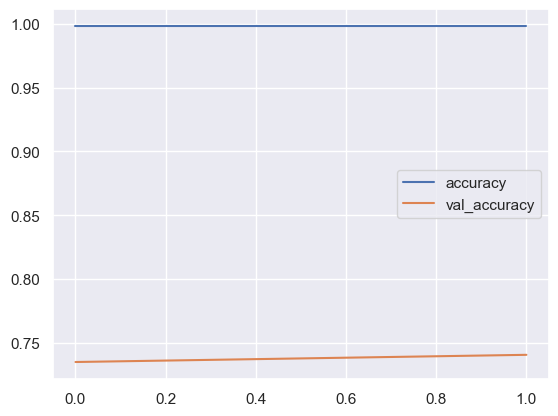

In [149]:
metrics[['accuracy','val_accuracy']].plot()

In [150]:
model.evaluate(X_test,y_test, verbose = 0)

[3.082329034805298, 0.7407407164573669]

In [151]:
y_pred_tensor = (model.predict(X_test) > 0.5).astype("int32")

67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


In [152]:
print(classification_report(y_test,y_pred_tensor))

              precision    recall  f1-score   support

           0       0.75      0.71      0.73      1062
           1       0.73      0.77      0.75      1071

    accuracy                           0.74      2133
   macro avg       0.74      0.74      0.74      2133
weighted avg       0.74      0.74      0.74      2133



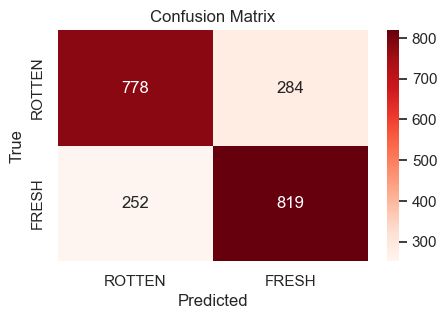

In [132]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_tensor)
cm = cm.reshape((2, 2))

# Create heatmap
plt.figure(figsize=(5, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', xticklabels=['ROTTEN', 'FRESH'], yticklabels=['ROTTEN', 'FRESH'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()